In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("placement.csv")

In [21]:
df.shape

(1000, 3)

In [5]:
df.sample(12)

,cgpa,placement_exam_marks,placed
865,6.77,16.0,0
343,7.20,70.0,1
775,6.76,24.0,0
965,7.37,52.0,1
234,8.09,36.0,0
785,6.07,29.0,1
838,6.84,32.0,0
810,7.14,21.0,1
848,7.20,27.0,1
696,6.94,20.0,0


In [8]:
df.columns

Index(['cgpa', 'placement_exam_marks', 'placed'], dtype='object')

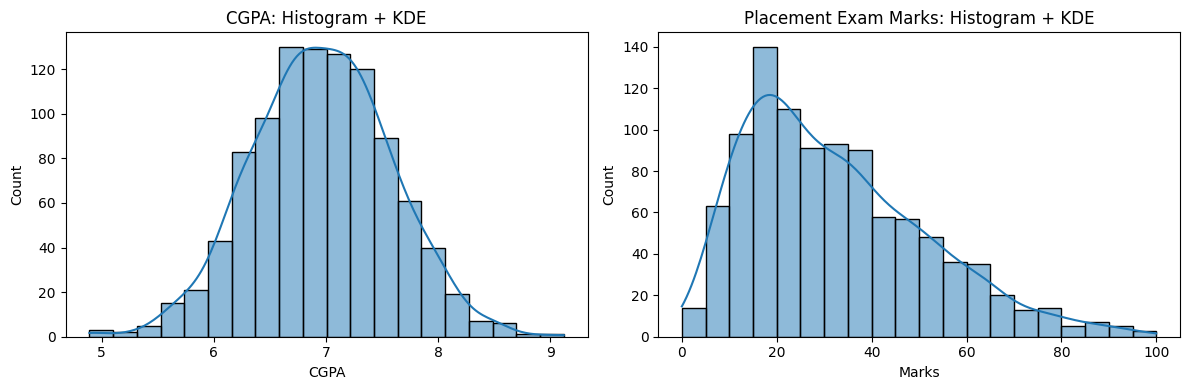

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# CGPA: Histogram + KDE
sns.histplot(
    df['cgpa'],
    kde=True,
    bins=20,
    ax=axes[0]
)
axes[0].set_title('CGPA: Histogram + KDE')
axes[0].set_xlabel('CGPA')

# Placement Exam Marks: Histogram + KDE
sns.histplot(
    df['placement_exam_marks'],
    kde=True,
    bins=20,
    ax=axes[1]
)
axes[1].set_title('Placement Exam Marks: Histogram + KDE')
axes[1].set_xlabel('Marks')

plt.tight_layout()
plt.show()

In [15]:
# here we can not apply z score technique to the 2nd column : as that is not normally distributed 

In [16]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323896
Min value of cgpa 4.89
Max value of cgpa 9.12


In [17]:
# Finding the boundary values
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [18]:
# Finding the outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


## Trimming

In [19]:
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]

In [20]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [22]:
new_df.shape

(995, 3)

#### Approach 2

In [23]:
# Calculating the Zscore
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [24]:
df.head(12)

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
5,7.30,23.0,1,0.550026
6,6.69,11.0,0,-0.440398
7,7.12,39.0,1,0.257770
8,6.45,38.0,0,-0.830073
9,7.75,94.0,1,1.280667


In [25]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [26]:
df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [27]:
# Trimming on the basis of z-score
new_df1 = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [28]:
new_df1

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


### Capping(winsorization)

In [29]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [31]:
upper_limit

8.808933625397168

In [ ]:
np.where(X,Y,Z)



In [34]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [37]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64